# DDA4210 Tutorial 4 - II. Semi-Supervised Learning

Label propagation and label spreading are semi-supervised learning algorithms that assign labels to unlabeled data points based on their similarity to labeled data points. They work by forming a fully-connected graph between all points given and solving for the steady-state distribution of labels at each point.

## 1. Label Propagation Algorithm

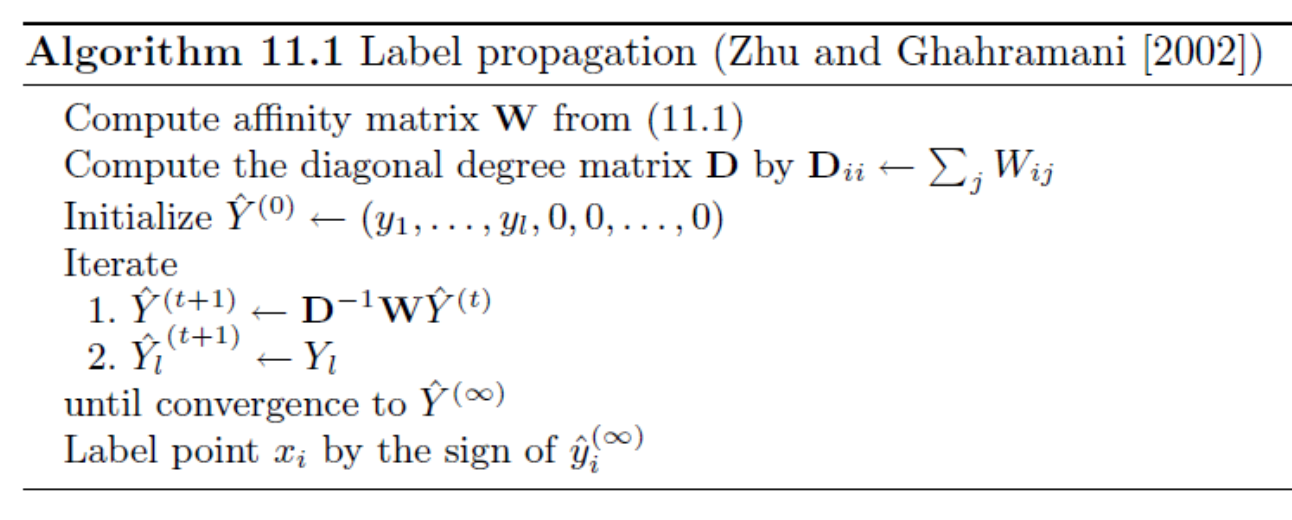


## 2. Label  Spreading Algorithm

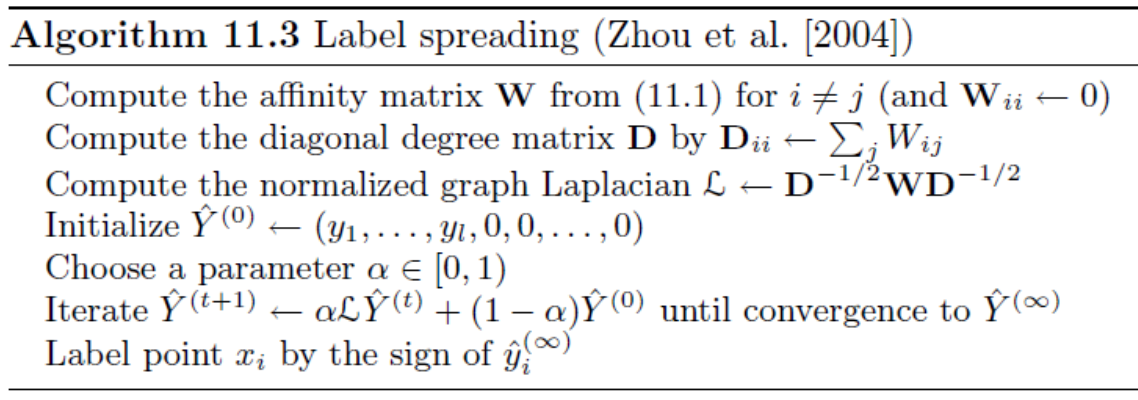

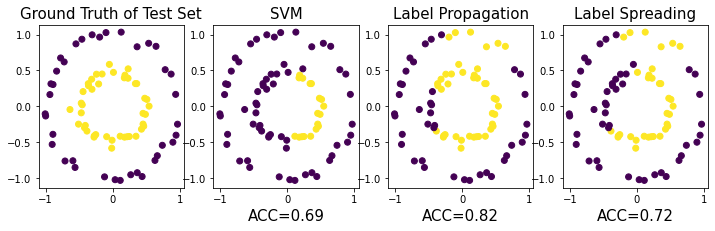

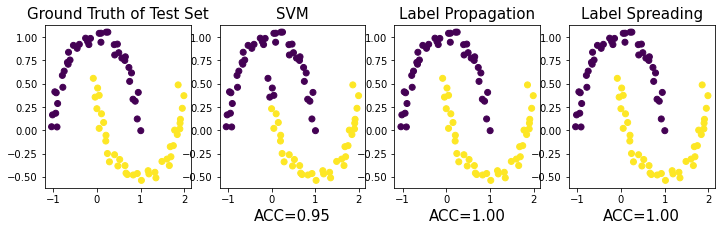

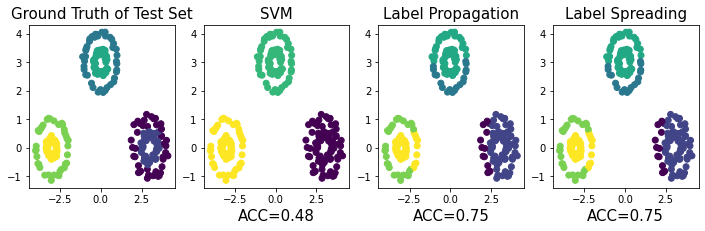

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

for i in range(3):
    # load dataset
    X, Y = dataset[i]

    # partition the dataset into a training set and a test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.8)

    # partition the training set into a labeled one and an unlabeled one
    X_train_label, X_train_unlabel, Y_train_label, Y_train_unlabel = train_test_split(X_train, Y_train, test_size=0.5)

    # ======================== SVM ===============================

    # train an SVM on the labeled data
    svm1 = SVC()
    svm1.fit(X_train_label, Y_train_label)

    # predict labels for the unlabeled data
    Y_train_unlabel_svm = svm1.predict(X_train_unlabel)

    # combine the labeled and unlabeled data
    X_combined_svm = np.vstack((X_train_label, X_train_unlabel))
    Y_combined_svm = np.hstack((Y_train_label, Y_train_unlabel_svm))

    # train another SVM on the combined data
    svm2 = SVC()
    svm2.fit(X_combined_svm, Y_combined_svm)

    # evaluate the performance on the test data
    Y_test_svm = svm2.predict(X_test)
    acc_svm = accuracy_score(Y_test, Y_test_svm)


    # =============== Label Propagation Algorithm ================

    # train an LP on the labeled data
    lp1 = LabelPropagation()
    lp1.fit(X_train_label, Y_train_label)

    # predict labels for the unlabeled data
    Y_train_unlabel_lp = lp1.predict(X_train_unlabel)

    # combine the labeled and unlabeled data
    X_combined_lp = np.vstack((X_train_label, X_train_unlabel))
    Y_combined_lp = np.hstack((Y_train_label, Y_train_unlabel_lp))

    # train another LP on the combined data
    lp2 = LabelPropagation()
    lp2.fit(X_combined_lp, Y_combined_lp)

    # evaluate the performance on the test data
    Y_test_lp = lp2.predict(X_test)
    acc_lp = accuracy_score(Y_test, Y_test_lp)


    # =============== Label Spreading Algorithm ================

    # train an LS on the labeled data
    ls1 = LabelSpreading()
    ls1.fit(X_train_label, Y_train_label)

    # predict labels for the unlabeled data
    Y_train_unlabel_ls = ls1.predict(X_train_unlabel)

    # combine the labeled and unlabeled data
    X_combined_ls = np.vstack((X_train_label, X_train_unlabel))
    Y_combined_ls = np.hstack((Y_train_label, Y_train_unlabel_ls))

    # train another LS on the combined data
    ls2 = LabelSpreading()
    ls2.fit(X_combined_ls, Y_combined_ls)

    # evaluate the performance on the test data
    Y_test_ls = ls2.predict(X_test)
    acc_ls = accuracy_score(Y_test, Y_test_ls)


    # =============== Plot Figures ================
    fig = plt.subplots(1, 4, figsize=(12, 3))
    plt.subplot(1, 4, 1)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test)
    plt.title('Ground Truth of Test Set',fontsize=15)
    plt.subplot(1, 4, 2)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_svm)
    plt.title('SVM',fontsize=15)
    plt.xlabel(f"ACC={acc_svm:.2f}",fontsize=15)
    plt.subplot(1, 4, 3)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_lp)
    plt.title('Label Propagation',fontsize=15)
    plt.xlabel(f"ACC={acc_lp:.2f}",fontsize=15)
    plt.subplot(1, 4, 4)
    plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test_ls)
    plt.title('Label Spreading',fontsize=15)
    plt.xlabel(f"ACC={acc_ls:.2f}",fontsize=15)
    plt.show()